In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#modeling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

In [27]:
filename =  'data/vectorized_jargon.csv'

In [28]:
df = pd.read_csv(filename)

In [29]:
df.head()

,claps,text,A/B testing,accuracy,action,activation function,active learning,AdaGrad,agent,agglomerative clustering,...,validation set,vanishing gradient problem,Wasserstein loss,weight,Weighted Alternating Least Squares (WALS),wide model,width,total_jargon_count,log_claps,log_jargon_count
0,489,ultimate guide acing coding interviews data sc...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,20,6.192362,2.995732
1,139,shakespeare versus eminem— who’s better lyrici...,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,8,4.934474,2.079442
2,133,implementing visualttransformer pytorch hi guy...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,42,4.890349,3.737670
3,92,stock price analysis pandas altair practical g...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,19,4.521789,2.944439
4,58,optimal threshold imbalanced classification ha...,0,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,145,4.060443,4.976734


In [30]:
X = df.drop(columns = ['claps', 'text', 'log_claps', 'log_jargon_count'])
y = df['claps']

#### Look at Phrase Frequency in the Corpus

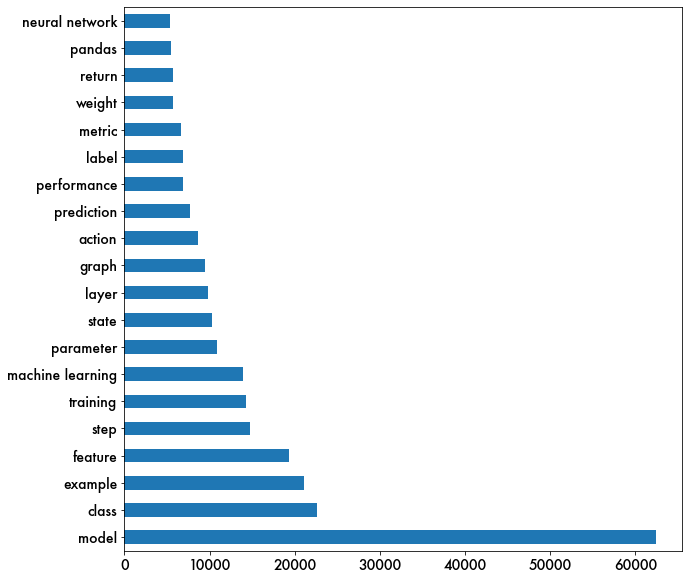

In [31]:
# plot top occurring words/phrases

#remove the total count for the plot
jargon_X = X.drop(columns='total_jargon_count')
plt.figure(figsize = (10,10))
jargon_X.sum().sort_values(ascending = False).head(20).plot(kind='barh');
figurefont = {'fontname' : 'Futura'}
plt.xticks(**figurefont, fontsize = 14);
plt.yticks(**figurefont, fontsize = 14);
#plt.savefig('figures/top_occurring_stemmed.jpg',  bbox_inches = "tight")

In [32]:
#train-test split
X_train, X_test, y_train, y_test=train_test_split(X,
                                                 y,
                                                 test_size=.2,
                                                 random_state=42)

In [33]:
model_list = [
    LinearRegression(),
    DecisionTreeRegressor(),
    BaggingRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    SVR(),
]

results_list = []

for model_obj in model_list:
    #instantiate each model 
    model = model_obj
   
    #fit the model
    model.fit(X_train, y_train) 
  
    #create a dictionary with scores and evaluation metrics for each model
    results_dict = {}    
    results_dict['model_name'] = str(model_obj)
    results_dict['train_score'] = model.score(X_train, y_train)
    results_dict['test_score'] = model.score(X_test, y_test)
    results_dict['cv_score'] = cross_val_score(model, X_train, y_train, cv = 5).mean()
    results_dict['train_RMSE'] = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    results_dict['test_RMSE'] = np.sqrt(mean_squared_error(y_test, model.predict(X_test))) 
    
    #add the dictionary to the list
    results_list.append(results_dict)

In [34]:
results = pd.DataFrame(results_list)
results

,model_name,train_score,test_score,cv_score,train_RMSE,test_RMSE
0,LinearRegression(),0.047637,-5.185582e+17,-1.025846e+21,112.549366,8.677150e+10
1,DecisionTreeRegressor(),0.997782,-7.669945e-01,-9.940540e-01,5.431675,1.601755e+02
2,BaggingRegressor(),0.800225,-6.949402e-02,-1.164185e-01,51.548122,1.246142e+02
3,RandomForestRegressor(),0.856636,-7.219760e-03,-2.821344e-02,43.667919,1.209318e+02
4,AdaBoostRegressor(),-0.785392,-7.268926e-01,-5.988860e-01,154.102126,1.583474e+02
5,SVR(),-0.111221,-1.083623e-01,-1.138650e-01,121.574406,1.268584e+02


These are very poor results. 

### Modeling Attempt II: Log of Claps

In [35]:
X = df.drop(columns = ['claps', 'text', 'log_claps', 'total_jargon_count'])
y = df['log_claps']

In [36]:
#train-test split
X_train, X_test, y_train, y_test=train_test_split(X,
                                                 y,
                                                 test_size=.2,
                                                 random_state=42)

In [37]:
model_list = [
    LinearRegression(),
    DecisionTreeRegressor(),
    BaggingRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    SVR()
]

results_list = []

for model_obj in model_list:
    #instantiate each model 
    model = model_obj
   
    #fit the model
    model.fit(X_train, y_train) 
  
    #create a dictionary with scores and evaluation metrics for each model
    results_dict = {}    
    results_dict['model_name'] = str(model_obj)
    results_dict['train_score'] = model.score(X_train, y_train)
    results_dict['test_score'] = model.score(X_test, y_test)
    results_dict['cv_score'] = cross_val_score(model, X_train, y_train, cv = 5).mean()
    results_dict['train_RMSE'] = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    results_dict['test_RMSE'] = np.sqrt(mean_squared_error(y_test, model.predict(X_test))) 
    
    #add the dictionary to the list
    results_list.append(results_dict)

In [38]:
results = pd.DataFrame(results_list)
results

,model_name,train_score,test_score,cv_score,train_RMSE,test_RMSE
0,LinearRegression(),0.048885,-2.679415e+14,-3.152818e+16,1.282608,2.192242e+07
1,DecisionTreeRegressor(),0.991812,-8.988210e-01,-9.267352e-01,0.119005,1.845485e+00
2,BaggingRegressor(),0.798768,-7.179057e-02,-7.722655e-02,0.589964,1.386511e+00
3,RandomForestRegressor(),0.854349,1.263887e-02,-8.461718e-04,0.501920,1.330781e+00
4,AdaBoostRegressor(),-0.012577,-1.185940e-02,-2.082683e-02,1.323400,1.347189e+00
5,SVR(),0.163713,8.662123e-03,-4.778523e-04,1.202693,1.333458e+00


None of these words account for the variance in the target variable. 